In [75]:
%matplotlib inline

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
import requests
from selenium import webdriver
import json

In [160]:
def get_data(country):
    driver = webdriver.PhantomJS()
    oecd_base_url = "http://www.oecdbetterlifeindex.org/countries/"
    driver.get("".join([oecd_base_url, country]))
    
    topics = driver.find_elements_by_css_selector('div#topics')[0]
    
    results = {}
    for t in topics.find_elements_by_css_selector('div.minichart'):
        if t.find_elements_by_css_selector('div.value'):
            a = t.text.split('\n')
            results[a[0]] = float(a[1])

    return results

In [168]:
with open('data/oecddata/countries.dat', 'r') as f:
    list_of_countries = f.read().splitlines()

In [172]:
data = {}
for c in list_of_countries:
    c_path = c.lower().replace(' ', '-')
    d = get_data(c_path)
    data[c] = d

In [176]:
with open('data/oecddata/result.json', 'w') as f:
    json.dump(data, f)

In [186]:
df = pd.DataFrame.from_dict(data, orient='index')

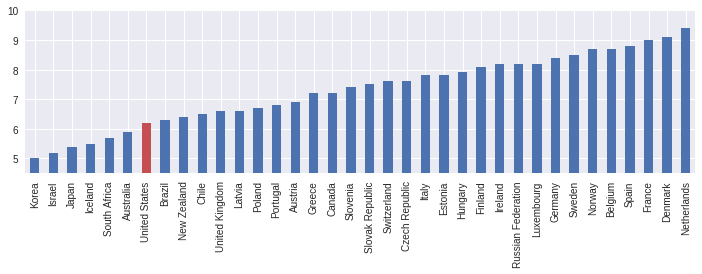

In [223]:
colors = [sns.color_palette()[0]] * len(df)
colors[6] = sns.color_palette()[2]
df.sort_values('Work-Life Balance').iloc[2:].plot(kind='bar',
                                                  ylim=(4.5,10),
                                                  figsize=(12,3),
                                                  y='Work-Life Balance',
                                                  legend=False,
                                                  color=colors)
plt.savefig('visualization/fig_oecd01.svg', bbox_inches='tight')